In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix

from yellowbrick.model_selection import LearningCurve
import xgboost as xgb

np.warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("is_it_clean.csv")
df

,Unnamed: 0,Unnamed: 0.1,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,...,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_MAX_OVERDUE,SK_DPD,SK_DPD_CARD
0,0,0,100002,1,0,24700.5,202500.0,351000.0,-637,1.0,...,0,0,0,0,0,0,0.0,8405.145,0.0,0.0
1,1,1,100003,0,0,35698.5,270000.0,1129500.0,-1188,2.0,...,0,0,0,0,0,0,0.0,0.000,0.0,0.0
2,2,2,100004,0,0,6750.0,67500.0,135000.0,-225,1.0,...,0,0,0,0,0,0,0.0,0.000,0.0,0.0
3,3,3,100006,0,0,29686.5,135000.0,297000.0,-3039,2.0,...,0,0,0,0,0,0,0.0,0.000,0.0,0.0
4,4,4,100007,0,0,21865.5,121500.0,513000.0,-3038,1.0,...,0,0,0,0,0,0,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304943,305230,305230,456251,0,0,27558.0,157500.0,225000.0,-236,1.0,...,0,0,0,0,0,0,0.0,0.000,0.0,0.0
304944,305231,305231,456252,0,0,12001.5,72000.0,225000.0,365243,1.0,...,0,0,0,0,0,1,0.0,0.000,0.0,0.0
304945,305232,305232,456253,0,0,29979.0,153000.0,585000.0,-7921,1.0,...,0,0,0,0,0,0,0.0,0.000,5.0,0.0
304946,305233,305233,456254,1,0,20205.0,171000.0,319500.0,-4786,2.0,...,0,0,0,0,0,0,0.0,0.000,0.0,0.0


In [3]:
X = df.drop(["TARGET"] , axis=1)
y = df.TARGET

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [5]:
X_train.shape

(243958, 122)

In [6]:
y_test.shape

(60990,)

# Preprocessing

In [7]:
preprocessing_ss = Pipeline(steps=[
    ('normal' , StandardScaler())])

In [8]:
sm = SMOTE( sampling_strategy='auto')

# 1 Iteration  , Logistic Regression + Standard Scaler 

In [9]:
pipeline_DC = Pipeline(steps = [['preprocess_min_max_scaler', preprocessing_ss],
                                    ['classifier', LogisticRegression()]
                                     ])
                                     

In [10]:
pipeline_DC.fit(X_train , y_train)

Pipeline(steps=[('preprocess_min_max_scaler',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['classifier', LogisticRegression()]])

# score to see if the model performed well

In [11]:
print("accuracy train : %.3f"%pipeline_DC.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_DC.score(X_test , y_test))

accuracy train : 0.919
accuracy test : 0.920


In [12]:
y_pred_DC = pipeline_DC.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred_DC))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56103
           1       0.00      0.00      0.00      4887

    accuracy                           0.92     60990
   macro avg       0.46      0.50      0.48     60990
weighted avg       0.85      0.92      0.88     60990



# Visualisation to see if the model performed well 

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

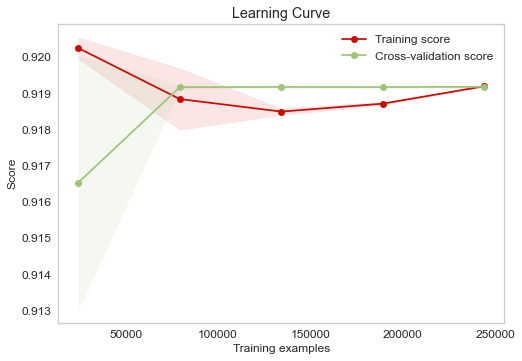

In [14]:
plot_learning_curve(pipeline_DC, X, y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

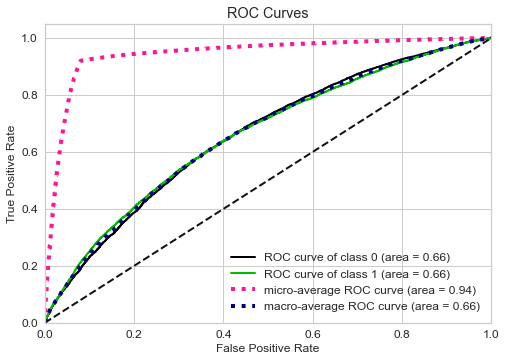

In [15]:
pipeline_DC.fit(X_train, y_train)
y_probas = pipeline_DC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

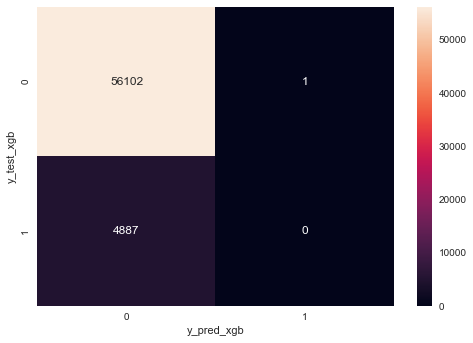

In [16]:
cm = confusion_matrix(y_test, y_pred_DC)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_xgb')
plt.ylabel('y_test_xgb') 
plt.show()

# 2 Iteration Logistic Regression +  Smote 

In [17]:
pipeline_sm_lr = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', LogisticRegression()]
                                     ])

In [18]:
pipeline_sm_lr.fit(X_train , y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ['classifier', LogisticRegression()]])

# Score to see the model performance


In [19]:
print("accuracy train : %.3f"%pipeline_sm_lr.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_sm_lr.score(X_test , y_test))

accuracy train : 0.527
accuracy test : 0.526


In [20]:
y_pred_sm_lr = pipeline_sm_lr.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_sm_lr))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67     56103
           1       0.10      0.63      0.18      4887

    accuracy                           0.53     60990
   macro avg       0.52      0.57      0.42     60990
weighted avg       0.87      0.53      0.63     60990



# Visualisation to see the model performance 

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

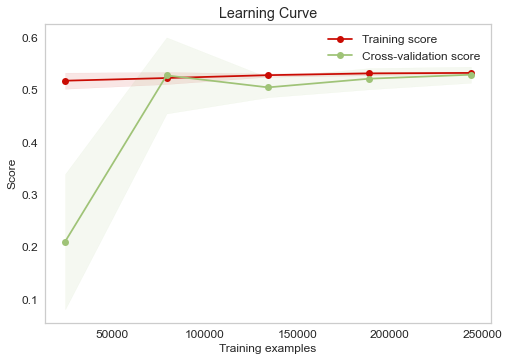

In [22]:
plot_learning_curve(pipeline_sm_lr, X, y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

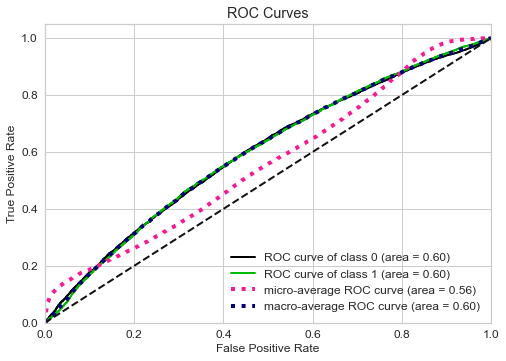

In [23]:
pipeline_sm_lr.fit(X_train, y_train)
y_probas = pipeline_sm_lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

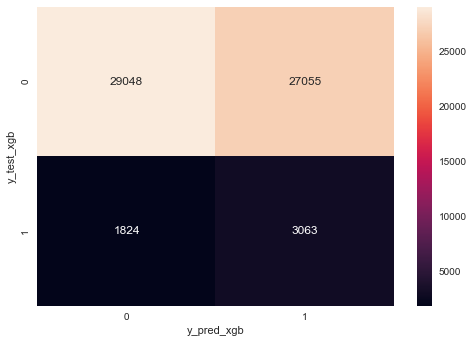

In [24]:
cm = confusion_matrix(y_test, y_pred_sm_lr)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_xgb')
plt.ylabel('y_test_xgb') 
plt.show()

# 3 Iteration Knn + Standard Scaler

In [25]:
pipeline_knn = Pipeline(steps =[['preprocessing' , preprocessing_ss],
                               ["Knn" ,  KNeighborsClassifier()]]) 

In [26]:
pipeline_knn.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['Knn', KNeighborsClassifier()]])

# Score to see model performance 

In [27]:
print("accuracy train : %.3f"%pipeline_knn.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_knn.score(X_test , y_test))

accuracy train : 0.921
accuracy test : 0.915


In [28]:
y_pred_knn = pipeline_knn.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56103
           1       0.16      0.01      0.03      4887

    accuracy                           0.91     60990
   macro avg       0.54      0.50      0.49     60990
weighted avg       0.86      0.91      0.88     60990



# Visualisation to see model performance

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

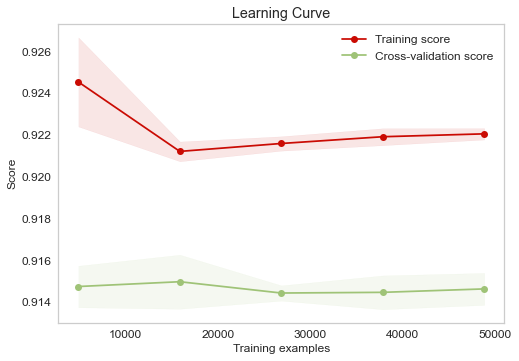

In [30]:
plot_learning_curve(pipeline_knn, X_test, y_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

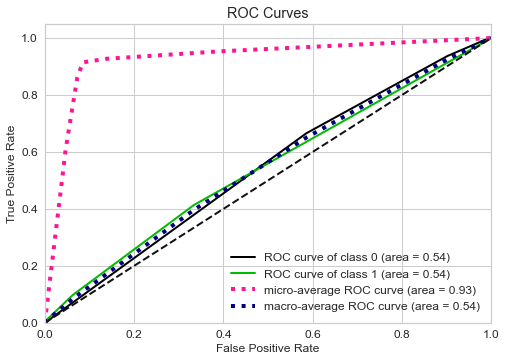

In [31]:
pipeline_knn.fit(X_train, y_train)
y_probas = pipeline_knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

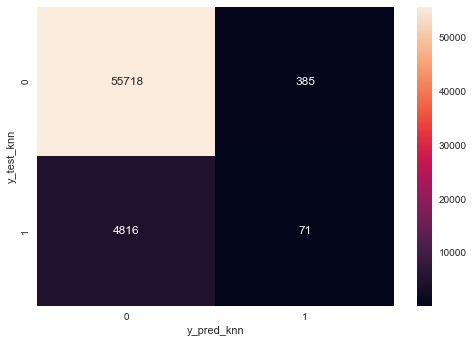

In [32]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_knn')
plt.ylabel('y_test_knn') 
plt.show()

# XGBOOST ITERATION


In [33]:
pipeline_xgb = Pipeline(steps=[['preprocess standard scaler ' , preprocessing_ss] , 
                                ['model_xgboost' , XGBClassifier()]])

In [34]:
pipeline_xgb.fit(X_train , y_train)

[12:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess standard scaler ',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['model_xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validat

# Score to see model performance

In [35]:
print("accuracy train : %.3f"%pipeline_xgb.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_xgb.score(X_test , y_test))

accuracy train : 0.920
accuracy test : 0.920


In [36]:
y_pred_xgb = pipeline_xgb.predict(X_test)

In [37]:
print(classification_report(y_test , y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56103
           1       0.42      0.00      0.01      4887

    accuracy                           0.92     60990
   macro avg       0.67      0.50      0.48     60990
weighted avg       0.88      0.92      0.88     60990



# Visualisation to see model performance

[12:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

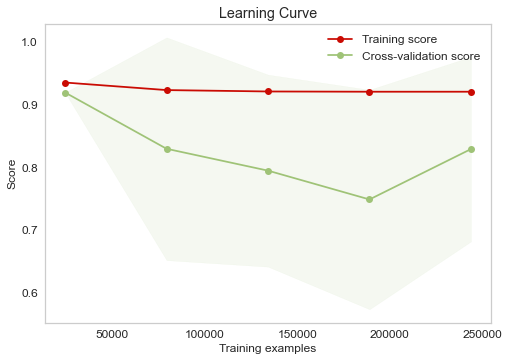

In [38]:
plot_learning_curve(pipeline_xgb, X, y)

[13:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

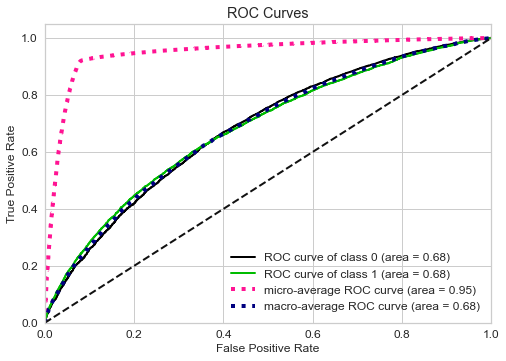

In [39]:
pipeline_xgb.fit(X_train, y_train)
y_probas = pipeline_xgb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

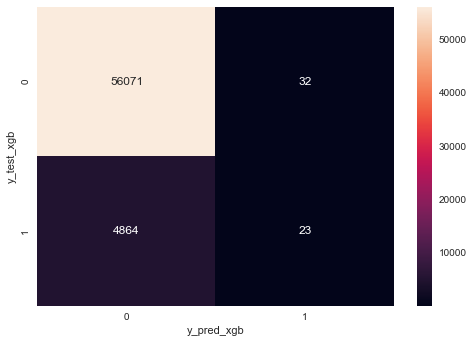

In [40]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_xgb')
plt.ylabel('y_test_xgb') 
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
pipeline_dtc = Pipeline(steps =[['preprocessing' , preprocessing_ss],
                               ["Knn" , DecisionTreeClassifier()]]) 

In [43]:
pipeline_dtc.fit(X_train , y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['Knn', DecisionTreeClassifier()]])

In [44]:
print("accuracy train : %.3f"%pipeline_dtc.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_dtc.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.848


In [45]:
y_pred_dtc = pipeline_dtc.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     56103
           1       0.11      0.13      0.12      4887

    accuracy                           0.85     60990
   macro avg       0.52      0.52      0.52     60990
weighted avg       0.86      0.85      0.85     60990



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

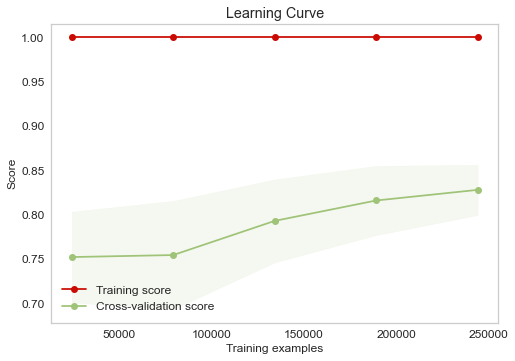

In [47]:
plot_learning_curve(pipeline_dtc, X, y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

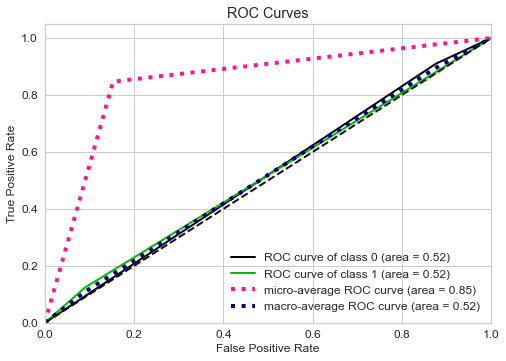

In [48]:
pipeline_dtc.fit(X_train, y_train)
y_probas = pipeline_dtc.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

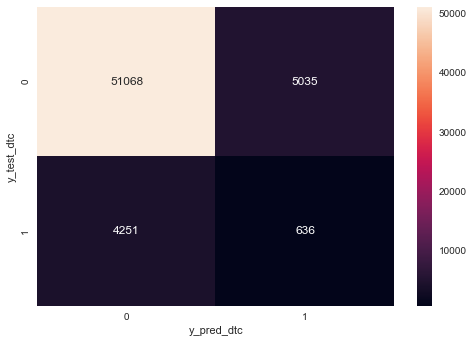

In [49]:
cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_dtc')
plt.ylabel('y_test_dtc') 
plt.show()

In [50]:
pipeline_xgb_sm = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', XGBClassifier()]
                                     ])

In [51]:
pipeline_xgb_sm.fit(X_train , y_train)

[13:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('SMOTE', SMOTE()),
                ['classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None)]])

In [52]:
print("accuracy train : %.3f"%pipeline_xgb_sm.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_xgb_sm.score(X_test , y_test))

accuracy train : 0.920
accuracy test : 0.919


In [53]:
y_pred_xgb_sm = pipeline_dtc.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred_xgb_sm))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     56103
           1       0.11      0.12      0.11      4887

    accuracy                           0.85     60990
   macro avg       0.51      0.52      0.52     60990
weighted avg       0.86      0.85      0.85     60990



[13:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

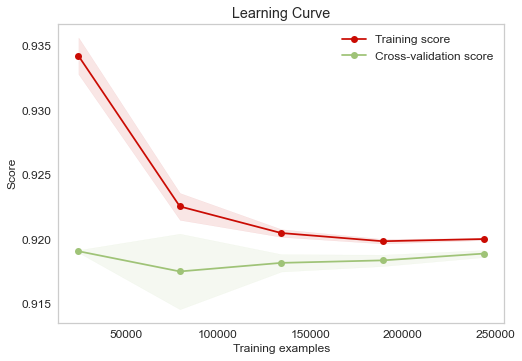

In [55]:
plot_learning_curve(pipeline_xgb_sm, X, y)

[13:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

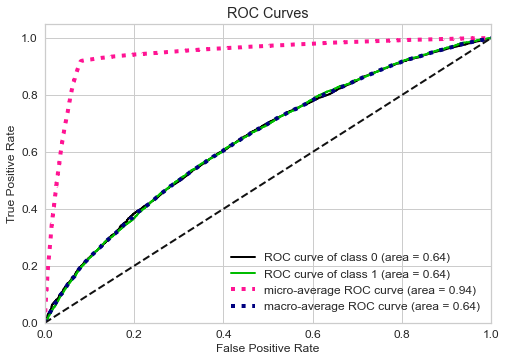

In [56]:
pipeline_xgb_sm.fit(X_train, y_train)
y_probas_xgb_sm = pipeline_xgb_sm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_xgb_sm)

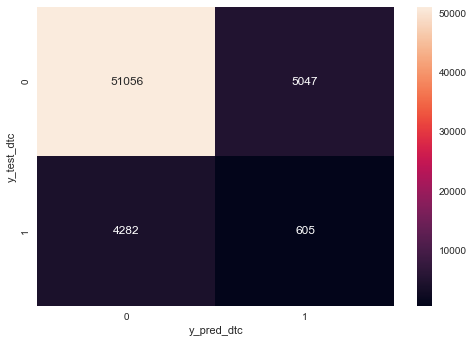

In [57]:
cm = confusion_matrix(y_test, y_pred_xgb_sm)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred_dtc')
plt.ylabel('y_test_dtc') 
plt.show()

In [58]:
import pickle
with open("test_pickle.pkl" , "wb")

SyntaxError: invalid syntax (<ipython-input-58-1be630ec36ed>, line 2)